![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


Integrantes:

- Gabriela Mora.
- Raúl Silva.

link al repositorio: https://github.com/RaulSilvaA/MDS7202-mora-silva

# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


# Introducción



El siguiente reporte se presenta como solución de negocio al señor Guiturra, quien solicitaba un modelo de predicción capaz de detectar si un cliente es de alto riesgo o no, es decir, dado los datos entregados por el historial crediticio de un usuario, pretender predecir si este pagará o no sus deudas ante el banco.

Los datos que se poseen son el historial crediticios de personas naturales, cada columna representa a una persona y posee información personal y financiera de este.

Para evaluar los resultasdos se tendrá en cuenta el F1-Score, métrica que toma bastante peso cuando se requiere tanto unm buen presision como un buen recall. Esto debido a que es tan relevante encontrar a gente que podría desistir de sus pagos, como también encontrar correctamente a estos, sin encacillar incorrectamente a personas que si cumplen con un perfil correcto.

Finalmente, dado los resultados, se opta por recomendar un modelo clásico de Random Forest con una profundidad máxima de 10 y un máximo de features de 5. Para la resolución se ingresaron filas con nulos (los que fueron limpiados y formateados correctamente, con tal de que fueran razonables e interpretables), esto con el fin de no sesgar del todo la predicción ante datos completos. Como se utiliza esto, se realizó un imputador, cuyo mayor resultado se optiene al utilizar este como constante.

Dado los resultados, se obtiene un 0.84 de F1 Score para la clase negativa, es decir los clientes que si pagarían sus deudas y un 0.57 para la clase positiva. Por lo que el modelo es levemente mejor que el azar para predecir potenciales clientes que no cumplan con sus labores de pago.

# Carga de datos Análisis Exploratorio de Datos

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_parquet('/content/drive/MyDrive/lab_progra/dataset.pq')

##  Preparación de Datos

In [4]:
import numpy as np
import pandas as pd

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

Se transformarán los datos a los tipos de datos que corresponden:

In [6]:
df['age'] = df['age'].astype('Int64')
df['total_emi_per_month'] = df['total_emi_per_month'].astype('float64')
df['num_credit_inquiries'] = df['num_credit_inquiries'].astype('Int64')
df['credit_history_age'] = df['credit_history_age'].astype('Int64')
df['num_of_loan'] = df['num_of_loan'].astype('Int64')
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].astype('Int64')
df['num_credit_inquiries'] = df['num_credit_inquiries'].astype('Int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  Int64  
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  Int64  
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  Int64  
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  Int64  
 13  outstanding_debt          12500 non-null  float64
 14  credit

Antes de comenzar a ver la parte del column transform, se decidirá comenzar a traspasar a dato nulo todos los valores atípicos que se encuentran en todas las variables. Un ejemplo de esto son los valores arriba de 100 años en la variable age.

Para hacer esto, se usó el apoyo el html que nos entregaron como parte del material, pero se consideró que era insuficiente para inspeccionar los datos por lo que se utilizó el siguiente bloque de código para ver la agrupación de los datos por cada una de las variables. Cuando se dice insuficiente es porque tampoco se podían observar bien las distribuciones de los datos y los valores atipicos estaban presentes en la mayoría de las columnas:

In [8]:
pd.DataFrame(df.groupby(['monthly_balance'])['monthly_balance'].count())

,monthly_balance
monthly_balance,
-3.333333e+26,1
3.825580e-01,1
7.102397e-01,1
1.779985e+00,1
3.967834e+00,1
...,...
1.422568e+03,1
1.434128e+03,1
1.446947e+03,1


El codigo anterior se varió por cada una de las variables y en el codigo que sigue se muestra como se filtraron los datos para traspasar a valor nulo los valores atípicos. No se adjuntarán el codigo de todas esas variaciones debido a lo repetitivo y la extensión del notebook que podría agregar.

In [9]:
df['age'] = np.where(df['age'] > 100, np.NaN, np.where(df['age'] < 18, np.NaN, df['age'] ))
df['occupation']=np.where(df['occupation']=='___', 'no declara', df['occupation'])
df['num_bank_accounts']=np.where(df['num_bank_accounts'] > 11, np.NaN, np.where(df['num_bank_accounts'] <0, np.NaN, df['num_bank_accounts'] ))
df['num_credit_card']=np.where(df['num_credit_card'] > 11, np.NaN, np.where(df['num_credit_card'] <0, np.NaN, df['num_credit_card'] ))
df['interest_rate']=np.where(df['interest_rate'] > 34, np.NaN, df['interest_rate'] )
df['num_of_loan']=np.where(df['num_of_loan'] > 9, np.NaN, np.where(df['num_of_loan'] <0, np.NaN, df['num_of_loan'] ))
df['delay_from_due_date']=np.where(df['delay_from_due_date'] <0, np.NaN, df['delay_from_due_date'])
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].fillna(-10)
df['num_of_delayed_payment']=np.where(df['num_of_delayed_payment'] > 28, np.NaN, np.where(df['num_of_delayed_payment'] <0, np.NaN, df['num_of_delayed_payment']))
df['changed_credit_limit'] = df['changed_credit_limit'].fillna(-10)
df['changed_credit_limit']=np.where(df['changed_credit_limit'] > 100, np.NaN, np.where(df['changed_credit_limit'] <0, np.NaN, df['num_of_delayed_payment'] ))
df['num_credit_inquiries'] = df['num_credit_inquiries'].fillna(-10)
df['num_credit_inquiries']=np.where(df['num_credit_inquiries'] > 17, np.NaN, np.where(df['num_credit_inquiries'] <0, np.NaN, df['num_credit_inquiries'] ))
df['monthly_balance']=np.where(df['monthly_balance'] <0, np.NaN, df['monthly_balance'] )

In [10]:
df['num_of_delayed_payment'].isna().sum()

1018

# Preparación de Datos

Ahora se realizará la parte del preparación de los datos según la distribución que se observó en las variables. Para las variables categóricas que no tienen orden, se usará el onehotencoder, para las variables categoricas que sí tienen un orden se usará el ordinalencoder y para las variables numéricas en donde se observe una dustribución normal se aplicará el standar scaler y en donde no se observe esto, debido a que no tenemos la claridad de qué distribución sigue la variable, se usará el robust scaler.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [12]:
variables_numericas_standarscaler=['age',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_utilization_ratio',
       'credit_history_age'
]

standarscaler_transformer = StandardScaler()


variables_numericas_robustscales=['annual_income','monthly_balance'
,'amount_invested_monthly', 'total_emi_per_month',  'outstanding_debt' ]

robustscaler_transformer = RobustScaler()

variables_categoricas=[
                       'occupation',
                       'payment_behaviour'
]
categorical_transformer =  OneHotEncoder(sparse_output=False, handle_unknown="ignore")

variable_ordinal=['payment_of_min_amount']
ordinal_transformer=OrdinalEncoder()

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_st", standarscaler_transformer, variables_numericas_standarscaler),
        ("num_ord", robustscaler_transformer, variables_numericas_robustscales),
        ("cat", categorical_transformer, variables_categoricas),
        ("ord", ordinal_transformer, variable_ordinal)
    ],  remainder='passthrough'
)

In [14]:
preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_st', StandardScaler(),
                                 ['age', 'monthly_inhand_salary',
                                  'num_bank_accounts', 'num_credit_card',
                                  'interest_rate', 'num_of_loan',
                                  'delay_from_due_date',
                                  'num_of_delayed_payment',
                                  'changed_credit_limit',
                                  'num_credit_inquiries',
                                  'credit_utilization_ratio',
                                  'credit_history_age']),
                                ('num_ord', RobustScaler(),
                                 ['annual_income', 'monthly_balance',
                                  'amount_invested_monthly',
                                  'total_emi_per_month', 'outstanding_debt']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['occupation', 'payment_behaviour']),
                                ('ord', OrdinalEncoder(),
                                 ['payment_of_min_amount'])])

In [15]:
df_pandas = preprocessor.fit_transform(df)

In [16]:
df_pandas

,num_st__age,num_st__monthly_inhand_salary,num_st__num_bank_accounts,num_st__num_credit_card,num_st__interest_rate,num_st__num_of_loan,num_st__delay_from_due_date,num_st__num_of_delayed_payment,num_st__changed_credit_limit,num_st__num_credit_inquiries,...,cat__payment_behaviour_!@9#%8,cat__payment_behaviour_High_spent_Large_value_payments,cat__payment_behaviour_High_spent_Medium_value_payments,cat__payment_behaviour_High_spent_Small_value_payments,cat__payment_behaviour_Low_spent_Large_value_payments,cat__payment_behaviour_Low_spent_Medium_value_payments,cat__payment_behaviour_Low_spent_Small_value_payments,ord__payment_of_min_amount,remainder__customer_id,remainder__credit_score
0,-1.148673,-0.744213,-0.911864,-0.741369,-1.320209,0.192783,-1.232985,-1.198636,-1.202563,-0.660730,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,CUS_0xd40,0
1,-0.656012,-0.361945,-1.297259,-0.741369,-0.977483,-1.035232,-1.232985,-1.521247,-1.526020,-1.161301,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,CUS_0x21b1,0
2,-0.064818,2.521028,-1.682655,-0.258466,-0.748999,-0.216555,-0.894754,-1.198636,-1.202563,-0.911015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,CUS_0x2dbc,0
3,2.004360,-0.496021,-1.297259,-0.258466,-1.205967,NaN,-1.165339,-0.714720,-0.717377,-0.660730,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,CUS_0xb891,0
4,-1.345738,-0.420138,0.629718,-0.258466,-1.091725,NaN,-1.368277,0.253113,0.252994,-0.660730,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,CUS_0x1cdb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,-1.542802,-0.226346,-2.068050,-0.741369,-0.977483,-1.035232,-0.827108,NaN,NaN,-1.411587,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,CUS_0x372c,0
12496,1.019037,NaN,-1.682655,-2.190078,-1.091725,0.192783,-1.368277,-2.166468,-2.172935,0.340414,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,CUS_0xf16,0
12497,1.511699,-0.343347,-1.682655,-0.741369,-1.091725,-0.216555,-0.962400,-0.714720,-0.717377,-0.911015,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,CUS_0xaf61,0
12498,-0.557480,-0.711107,1.785904,1.190242,1.650082,0.602121,0.796402,1.866167,1.870280,0.590699,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,CUS_0x8600,0


## Holdout

In [17]:
X = df.drop(['customer_id','credit_score'], axis=1)
y = df['credit_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=190423)

##  Baseline

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

In [19]:
selection_pipeline_dummy = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("model", DummyClassifier(strategy='stratified'))
    ]
)

selection_pipeline_LR = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("model", LogisticRegression(random_state=0))
    ]
)

selection_pipeline_KNC= Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("model", KNeighborsClassifier())
    ]
)


selection_pipeline_DTC= Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("model", DecisionTreeClassifier(random_state=0))
    ]
)

selection_pipeline_SVC= Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("model", SVC())
    ]
)

selection_pipeline_RFC= Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("model", RandomForestClassifier())
    ]
)


selection_pipeline_LGB= Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("model", lgb.LGBMClassifier())
    ]
)

selection_pipeline_XGB= Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("model", XGBClassifier())
    ]
)



Entrenamiento de los modelos

In [20]:
from sklearn.metrics import classification_report

In [21]:
#dummy
selection_pipeline_dummy.fit(X_train, y_train)
y_pred_dummy = selection_pipeline_dummy.predict(X_test)

#dtc
selection_pipeline_DTC.fit(X_train, y_train)
y_pred_dtc = selection_pipeline_DTC.predict(X_test)

#knc
selection_pipeline_KNC.fit(X_train, y_train)
y_pred_knc = selection_pipeline_KNC.predict(X_test)

#lgb
selection_pipeline_LGB.fit(X_train, y_train)
y_pred_lgb = selection_pipeline_LGB.predict(X_test)

#lr
selection_pipeline_LR.fit(X_train, y_train)
y_pred_lr = selection_pipeline_LR.predict(X_test)

#rfc
selection_pipeline_RFC.fit(X_train, y_train)
y_pred_rfc = selection_pipeline_RFC.predict(X_test)

#svc
selection_pipeline_SVC.fit(X_train, y_train)
y_pred_svc = selection_pipeline_SVC.predict(X_test)

#xgb
selection_pipeline_XGB.fit(X_train, y_train)
y_pred_xgb = selection_pipeline_XGB.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
dummy_report = classification_report(y_test, y_pred_dummy)
dtc_report = classification_report(y_test, y_pred_dtc)
knc_report = classification_report(y_test, y_pred_knc)
lgb_report = classification_report(y_test, y_pred_lgb)
lr_report = classification_report(y_test, y_pred_lr)
rfc_report = classification_report(y_test, y_pred_rfc)
svc_report = classification_report(y_test, y_pred_svc)
xgb_report = classification_report(y_test, y_pred_xgb)

In [23]:
dummy_report = classification_report(y_test, y_pred_dummy)
dtc_report = classification_report(y_test, y_pred_dtc)
knc_report = classification_report(y_test, y_pred_knc)
lgb_report = classification_report(y_test, y_pred_lgb)
lr_report = classification_report(y_test, y_pred_lr)
rfc_report = classification_report(y_test, y_pred_rfc)
svc_report = classification_report(y_test, y_pred_svc)
xgb_report = classification_report(y_test, y_pred_xgb)

In [24]:
from sklearn.metrics import classification_report

# Suponiendo que las variables ya están definidas con sus respectivos valores

# Imprimir dummy_report
print("dummy_report:")
print(dummy_report)
print("\n\n")

# Imprimir dtc_report
print("dtc_report:")
print(dtc_report)
print("\n\n")

# Imprimir knc_report
print("knc_report:")
print(knc_report)
print("\n\n")

# Imprimir lgb_report
print("lgb_report:")
print(lgb_report)
print("\n\n")

# Imprimir lr_report
print("lr_report:")
print(lr_report)
print("\n\n")

# Imprimir rfc_report
print("rfc_report:")
print(rfc_report)
print("\n\n")

# Imprimir svc_report
print("svc_report:")
print(svc_report)
print("\n\n")

# Imprimir xgb_report
print("xgb_report:")
print(xgb_report)
print("\n\n")


dummy_report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1785
           1       0.29      0.30      0.29       715

    accuracy                           0.59      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.59      0.59      0.59      2500




dtc_report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1785
           1       0.44      0.47      0.46       715

    accuracy                           0.68      2500
   macro avg       0.61      0.62      0.62      2500
weighted avg       0.69      0.68      0.68      2500




knc_report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1785
           1       0.57      0.43      0.49       715

    accuracy                           0.74      2500
   macro avg       0.68      0.65      0.66      2500
weighted avg       0.73      0

# Optimización del Modelo

Los seleccionados son lgb y el random forest classifier

In [25]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [26]:
from sklearn.metrics import f1_score


def train_and_evaluate(
    pipe, print_=True, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
):

    # notar que los datasets son parámetros por defecto.

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    if print_:
        print("Matriz de confusión: \n")
        print(confusion_matrix(y_test, y_pred, labels=pipe.classes_))
        print("\nReporte de Clasificación: \n")
        print(
            classification_report(y_test, y_pred),
        )

    return f1_score(y_test, y_pred, average="macro")

In [27]:
param_grid = [
    {
    'imputer__strategy': ['mean', 'median', 'most_frequent', 'constant'],
    'model__max_depth': list(range(10, 15)),
    'model__max_features': list(range(1,15))
    }]
hgs_rfc = HalvingGridSearchCV(selection_pipeline_RFC, param_grid, n_jobs=-1, scoring='f1_macro', verbose=10)

In [28]:
train_and_evaluate(hgs_rfc)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 41
max_resources_: 10000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 280
n_resources: 41
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
----------
iter: 1
n_candidates: 94
n_resources: 123
Fitting 5 folds for each of 94 candidates, totalling 470 fits
----------
iter: 2
n_candidates: 32
n_resources: 369
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 3
n_candidates: 11
n_resources: 1107
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 4
n_candidates: 4
n_resources: 3321
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Matriz de confusión: 

[[1550  235]
 [ 337  378]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1785
           1       0.62      0.53      0.57       715

    accuracy                       

0.706751843977216

In [29]:
hgs_rfc.best_params_

{'imputer__strategy': 'most_frequent',
 'model__max_depth': 13,
 'model__max_features': 14}

In [30]:
param_grid = [{
    'imputer__strategy': ['mean', 'median', 'most_frequent', 'constant'],
    'model__num_leaves': [31, 127],
    'model__reg_alpha': [0.1, 0.5],
    'model__min_data_in_leaf': [30, 50, 100, 300, 400],
    }]

hgs_lgb = HalvingGridSearchCV(selection_pipeline_LGB, param_grid, n_jobs=-1, scoring='f1_macro', verbose=10)

In [31]:
train_and_evaluate(hgs_lgb)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 370
max_resources_: 10000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 80
n_resources: 370
Fitting 5 folds for each of 80 candidates, totalling 400 fits
----------
iter: 1
n_candidates: 27
n_resources: 1110
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 2
n_candidates: 9
n_resources: 3330
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 3
n_resources: 9990
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Matriz de confusión: 

[[1548  237]
 [ 336  379]]

Reporte de Clasificación: 

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1785
           1       0.62      0.53      0.57       715

    accuracy                  

0.7066616374239547

In [32]:
hgs_lgb.best_params_

{'imputer__strategy': 'median',
 'model__min_data_in_leaf': 30,
 'model__num_leaves': 31,
 'model__reg_alpha': 0.5}

Dados los resultados, el mejor modelo enconmtrado fue uno basado Random Forest, luego del preprocesamiento, incluyendo un imputer constante.

In [33]:
model_RFC= Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="constant")),
        ("model", RandomForestClassifier(max_depth=10, max_features=5))
    ]
)

In [34]:
#rfc
model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)

In [35]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1785
           1       0.61      0.56      0.58       715

    accuracy                           0.77      2500
   macro avg       0.72      0.71      0.71      2500
weighted avg       0.77      0.77      0.77      2500



# Interpretabilidad:

Elo método propuesto es el más adecuado dado los resultados obtenidos. En cuanto a lo que se busca es la clasificación de los usuarios en dos clases. Dadas las variables que fueron entregadas, se pueden apreciar en el siguiente gráfico su importancia para la toma de decisiones dentro del modelo.

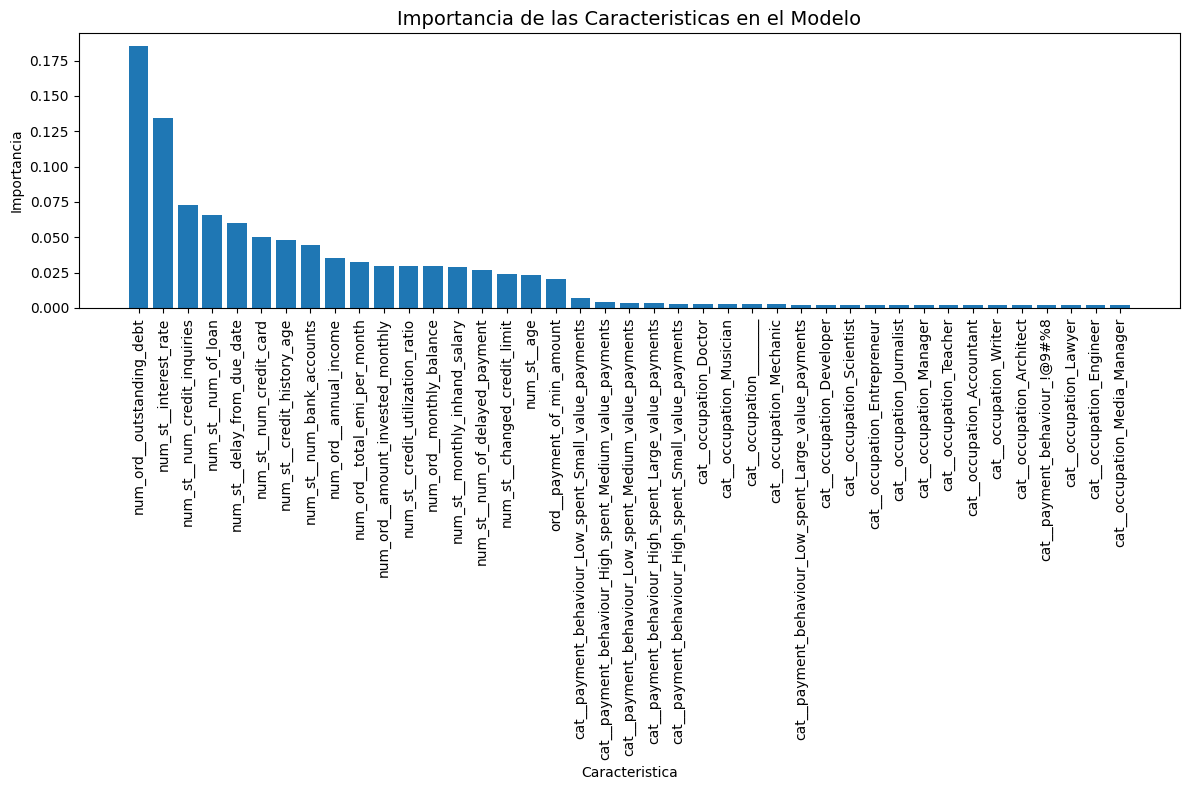

In [68]:
import matplotlib.pyplot as plt

estimador_rf = model_RFC.named_steps['model']
importancia_caracteristicas = estimador_rf.feature_importances_
nombres_caracteristicas = model_RFC.named_steps['preprocessing'].get_feature_names_out()
df_importancia = pd.DataFrame({'Caracteristica': nombres_caracteristicas, 'Importancia': importancia_caracteristicas})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
plt.figure(figsize=(12, 8))


plt.bar(df_importancia['Caracteristica'], df_importancia['Importancia'])
plt.xticks(rotation=90, fontsize=10)
plt.yticks()
plt.xlabel('Caracteristica')
plt.ylabel('Importancia')
plt.title('Importancia de las Caracteristicas en el Modelo', fontsize=14)
plt.tight_layout()
plt.show()

Tal como se puede apreciar, las carácterísticas demográficas de la persona no poseen un gran peso en la predicción, como lo pueden ser su edad u ocupación. Esto evita grandes sesgos en la predicción, sin embargo, no dista de ellos del todo. A pesar de esto, variables como el la deuda pendiente, la tasa de interés, las peticiones crediticias, la cantidad de hipotecas y el retraso desde la última deuda si son relevantes para la predicción en el modelo, así como otras variables que se pueden observar con detenimiento, en caso de requerirse. Esto cobra sentido lógico, pues son parámetros que, dados ciertos criterios, se puede asociar directamente al historial crediticio de una persona. El mal uso o la mala presentación en estos valores debería tener un gran peso, tal como está ocurriendo.

Por otra parte, variables como lo pueden ser las categóricas no poseen un gran peso en el estudio por lo que son del todo dispensables, evitar el uso de estas podría ser una opción, así se aseguran el evadir sesgos posibles en base a elementos arbitrarios como lo puede ser que una persona posera un título universitario en alguna de las carreras que se listan o no.





In [69]:
import random


random.seed(3)
indices = random.sample(range(len(X_test)), 10)
random_samples = X_test.iloc[indices]


random_predictions = model_RFC.predict(random_samples)
random_probabilities = model_RFC.predict_proba(random_samples)

print(random_predictions, '\n',random_probabilities)

[1 0 0 0 0 0 1 0 0 0] 
 [[0.28908761 0.71091239]
 [0.54259275 0.45740725]
 [0.85294379 0.14705621]
 [0.88802492 0.11197508]
 [0.87619226 0.12380774]
 [0.85371234 0.14628766]
 [0.32719202 0.67280798]
 [0.87995243 0.12004757]
 [0.83098031 0.16901969]
 [0.83823665 0.16176335]]


In [64]:
import numpy as np
import plotly.express as px

# Supongamos que tienes la matriz como un array de numpy

df_prob = pd.DataFrame(random_probabilities, columns=['negativa', 'positiva'])
df_prob['persona'] = ['Persona ' + str(i) for i in range(1, 11)]

fig = px.bar(df_prob, x="persona", y=["negativa", "positiva"], title="Probabilidades ante el muestro aleatorio de 10 personas")
fig.show()



Al tomar 10 elementos aleatorios del dataset y pasarlos podemos observar sus clases predichas. Para obtener más detalles podemos ver qué tal probable es que cada usuario sea dado como positivo o negativo en la predicción. Si bien es solo un muestreo pequeño, se puede observar la tendencia mencionada (que se sustenta en las métricas entregadas) de poder asegurar con mayor firmeza cuando un usuario es negativo a cuando un usuario es positivo, incluyendo en este ejemplo en particular a una persona a quien el modelo no identifica correctamente como positiva o negativa, pues posee valores cercanos al 0.5 en la probabilidad de que sea cualquiera de las dos clases.



En resumen, el modelo no presenta grandes impactos en cuanto a sesgo y, si bien puede predecir en su mayoría los casos que se pretenden estudiar, no sería del todo de ayuda en casos en los que el modelo no posee una gran certeza del posible resultado con la persona en cuestión, por lo que se recomienda ver tanto la clase, como la probabilidad asignada en cada caso.

# Conclusiones

Dado el problema expuesto, se fue capaz de resolver el mismo, sin embargo sin la obtención de una métrica que se podría encasillar como 'buena'. El modelo obtenido es simple, interpretable y dista de sesgo, por lo que efectivamente podría ser aplicable, sin embargo un buen método de aplicación sería el tener en la mira a quienes aparecen como positivos y despreocuparse de los negativos del todo. Así reducirían el riesgo y el tiempo de acción, pues los estudios se reducirían a solo interpretar y enfocar a quienes pudieran efectivamente parecer positivos según el modelo.

Entender el EDA fue relevante en el contexto de que, si no se entienen los datos con los que se está trabajando, no hay resultados que sean interpretables o significativos, pues si los datos hubieran sido basura o no lo suficientemente representativos, el modelo sería solo un endulzador de algo que de por si no funciona.

El rendimiento del baseline fue lo suficientemente bueno como para quedarnos con un par de modelos que funcionaran en temas de clasificación y que tuvieran unas buenas métricas. A pesar de esto, la optimización de los parámetros de estos modelos no fueron del todo significativos, sin embargo si mejoraron levemente los resultados obtenidos, sobre todo el aplicar esto sobre el imputador.

Finalmente podemos llegar a la conclusión de que el modelo no es del todo funcional. Predice bien a la clase dominante, pero no del todo a la clase positiva, que poseía menos datos. Quizás existan mejores maneras de modelar el problema, incluyendo un balance de clases con oversampleo o subsampleo, se tendría que porbar esto, sin embargo el que el Random Forest haya sido el modelo y el hecho de que las variables categórocas pudieran introducir un sesgo y/o no sirvieran para mucho podrían hacer que, dada una seguna u óptima aplicación de un modelo para el caso, se disten de ellas.

Finalmente mencionar que el proyecto nos coloca en un contexto bastante real pero simplificado. La aplicación de estos pasos (y más, incluyendo elementos que hayamos omitido) son lo que se bería manejar en todo sentido al momento de afrontar a la industria, esto como un mínimo.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>